In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from scipy import sparse
from matplotlib import cm
import plotly.graph_objects as go

In [ ]:
n=100
e=3.795
n2=n**2
h=197.3
m= 940#(0.511*10**6)
domain=5
a=-domain#1e-5#
b=domain
d=1/n#abs((b-a)/n)
k=(h**2)/(2*m*d**2)
k1=100


In [ ]:
x,y=np.meshgrid(np.linspace(a,b,n),np.linspace(a,b,n))


array([[-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       ...,
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ]])

In [ ]:
def Hpot(x,y):
  return (1/2)*k1*(x**2+y**2)
def Epot(x,y):
  return e**2/(x**2+y**2)**(1/2)
def Npot(x,y):
  return 0*x
#V=Epot(x,y)

In [ ]:
L=np.zeros((n2,n2))
for i in range(n2):
  L[i,i]=-4
  if ((i+1)%(n)!=0) and (i!=n2-1):
    L[i+1,i]=1
    L[i,i+1]=1
Y=np.ones(n2-n)
dy= np.diag(Y,n)+np.diag(Y,-n)
#L=(L+dy)*k
#L
L=sparse.csc_matrix((L+dy)*k)


In [ ]:
V=Hpot(x,y)
#V.reshape(n2)
#U=np.diag(V.reshape(n2),0)+ np.zeros((n2,n2))
U=sparse.csc_matrix(np.diag(V.reshape(n2),0)+ np.zeros((n2,n2)))


In [ ]:
l=0
M=np.zeros((n2,n2))
M=((h**2/(2*m))*(l*(l+1)))/(x**2+y**2)
E=sparse.diags(M.reshape(n2),(0))

#for i in range(n2):
 # M[i,i]= (k*l*(l+1))/(x.reshape(n2)[i]**2+y.reshape((n2))[i]**2)

In [ ]:
H=-L+U#-M
#H=-(L+U-E)


In [ ]:
#values,vectors= np.linalg.eigh(H)
values,vectors= eigsh(H,k=10,which='SM')
#vectors.T[1]
#values[0:10]
#for i in range(20):
 # print(values[i+1]-values[i])
values[0:3]

array([ 698.53155667, 1495.76946915, 1495.76946915])

In [ ]:
def wavefn(i):
  return (vectors.T[i].reshape(n,n))**1

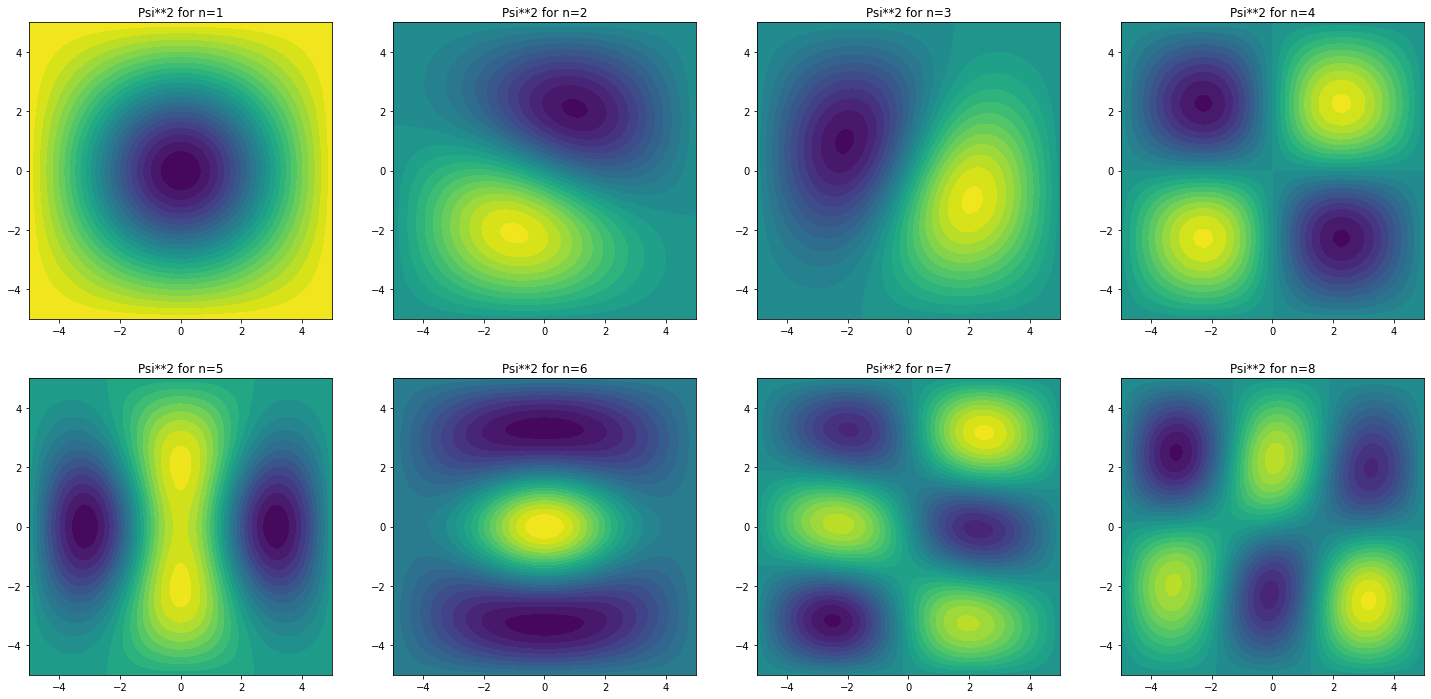

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(25,12))
for j in range(0,2):
  for i in range(0,4):
    ax=axes[j,i]
    if j==0:
      ax.set_title('Psi**2 for n={}'.format(i+1))
      v=ax.contourf(x,y,wavefn(i),levels=25)
    else:
      ax.set_title('Psi**2 for n={}'.format(i+5))
      ax.contourf(x,y,wavefn(i+4),levels=25)

In [ ]:
#con=plt.contourf(x,y,(2*wavefn(4))**2,levels=25)


In [ ]:
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = go.Figure(data=[go.Surface(x=x, y=y, z=wavefn(1))])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
#ax.plot_surface(x,y,wavefn(1),cmap=cm.coolwarm)
fig.show()